In [20]:
import numpy as np
import pickle
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
reshaped_path = '/work/forkert_lab/erik/MACAW/reshaped/3D'
pca_path = '/work/forkert_lab/erik/PCA3D'
df_ukbb_train = '/home/erik.ohara/UKBB/train.csv'
pca_test_path = '/work/forkert_lab/erik/MACAW/decoded_images/PCA3D_10625'
nevecs = 15000

In [4]:
df_pca_test = pd.read_csv(pca_test_path + '/PCA3D_MSE_per_nevecs.csv', low_memory=False)

In [18]:
df_pca_test['MSEloss_item']= [0.0029820178169757128,
                             0.00250287726521492,
                             0.0022200806997716427,
                             0.0020258252043277025,
                             0.0018813461065292358,
                             0.0017685963539406657,
                             0.001677812892012298,
                             0.001603072159923613,
                             0.0015405070735141635,
                             0.0014873836189508438,
                             0.001441689790226519,
                             0.0014022134710103273,
                             0.001367672928608954,
                             0.0013371841050684452,
                             0.001310173887759447,
                             0.0012860080460086465,
                             0.0012643004301935434]

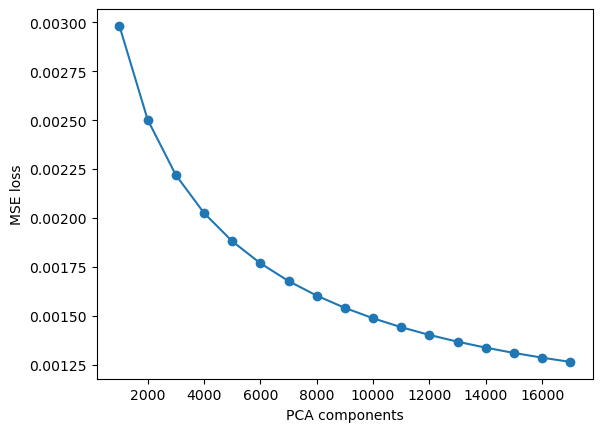

In [23]:
# Plotting the graph
plt.plot(df_pca_test['nevecs'], df_pca_test['MSEloss_item'], marker='o')

# Adding labels and title
plt.xlabel('PCA components')
plt.ylabel('MSE loss')
#plt.title('Sample Plot')

# Display the plot
plt.show()

In [3]:
data = np.load(reshaped_path + '/reshaped_3D_train.npy')

In [5]:
data = data.reshape(data.shape[0],-1)

In [9]:
with open(pca_path + "/evecs.pkl",'rb') as f:  
    evecs3D = pickle.load(f)

In [10]:
def encode(data, evecs):
    return np.matmul(data,evecs.T)

In [13]:
df_train = pd.read_csv(df_ukbb_train,low_memory=False)

In [21]:
encoded_data = encode(data,evecs3D[:nevecs])

In [26]:
encoded_data.shape

(18953, 15000)

In [22]:
corr_pearsonr = []
corr_spearmanr = []
for evec in range(5):
    corr, _ = pearsonr(encoded_data[:,evec], df_train['Age'])
    corr_pearsonr.append(corr)
    corr2, _ = spearmanr(encoded_data[:,evec], df_train['Age'])
    corr_spearmanr.append(corr2)

In [23]:
corr_pearsonr

[0.026245377639125152,
 0.4371175971185215,
 0.009002213448189834,
 -0.13494319062732463,
 -0.1352672211065945]

In [24]:
corr_spearmanr

[0.03628162537480502,
 0.43960875041709896,
 0.0014922388274494264,
 -0.13500461831941216,
 -0.13516445140593694]

In [40]:
corr_pearsonr_all = []
corr_spearmanr_all = []
for evec in range(nevecs):
    corr, p1 = pearsonr(encoded_data[:,evec], df_train['Age'])
    corr_pearsonr_all.append(corr)
    if abs(corr) > 0.01:
        print(f"Evec {evec} has pearsonr equal: {corr},{p1}")
    corr2, p2 = spearmanr(encoded_data[:,evec], df_train['Age'])
    corr_spearmanr_all.append(corr2)
    if abs(corr2) > 0.01:
        print(f"Evec {evec} has spearmanr equal: {corr2},{p2}")
        print("")

Evec 0 has pearsonr equal: 0.026245377639125152,0.00030199522477288704
Evec 0 has spearmanr equal: 0.03628162537480502,5.847012505146225e-07

Evec 1 has pearsonr equal: 0.4371175971185215,0.0
Evec 1 has spearmanr equal: 0.43960875041709896,0.0

Evec 3 has pearsonr equal: -0.13494319062732463,1.0125835722612011e-77
Evec 3 has spearmanr equal: -0.13500461831941216,8.624411384165371e-78

Evec 4 has pearsonr equal: -0.1352672211065945,4.338980194706068e-78
Evec 4 has spearmanr equal: -0.13516445140593694,5.678257279401232e-78

Evec 5 has pearsonr equal: 0.1170571856034106,8.236255457905858e-59
Evec 5 has spearmanr equal: 0.11146033260581438,1.8608088894693955e-53

Evec 6 has pearsonr equal: 0.06551791123144345,1.7332576783112262e-19
Evec 6 has spearmanr equal: 0.06135051797173624,2.826358813040583e-17

Evec 7 has pearsonr equal: 0.1515517605016227,9.174416154619229e-98
Evec 7 has spearmanr equal: 0.14953630466042248,3.337921670734646e-95

Evec 8 has pearsonr equal: 0.03905284800217376,7.52

Evec 89 has spearmanr equal: -0.03161350866426659,1.3426919006297111e-05

Evec 90 has pearsonr equal: 0.03468523464696923,1.786079095501018e-06
Evec 90 has spearmanr equal: 0.03295391123818284,5.687253737470449e-06

Evec 91 has pearsonr equal: -0.016658916464671734,0.02182273480723559
Evec 91 has spearmanr equal: -0.017395633883765995,0.016625881129927175

Evec 93 has pearsonr equal: 0.01587352579860153,0.028866845157141673
Evec 93 has spearmanr equal: 0.018785845786402754,0.009701159436224932

Evec 95 has pearsonr equal: -0.03157538308021797,1.3752433885653934e-05
Evec 95 has spearmanr equal: -0.030072774117431113,3.461282492712396e-05

Evec 96 has pearsonr equal: -0.024170845406561513,0.0008751444475720204
Evec 96 has spearmanr equal: -0.02103165297097615,0.0037848902216386687

Evec 97 has pearsonr equal: 0.025167531664533706,0.0005299718107379312
Evec 97 has spearmanr equal: 0.021708673069435237,0.0028008840609015126

Evec 99 has pearsonr equal: -0.10475024017646281,2.17438963426406

Evec 182 has pearsonr equal: -0.029325666463939346,5.394022169462489e-05
Evec 182 has spearmanr equal: -0.03151260993407906,1.4304845930534582e-05

Evec 184 has pearsonr equal: 0.010339979996917822,0.1546062906699577
Evec 184 has spearmanr equal: 0.012452576282567095,0.08647396222782487

Evec 185 has pearsonr equal: -0.023639367546924472,0.0011352444388286862
Evec 185 has spearmanr equal: -0.022676476519778582,0.001795880998635187

Evec 187 has pearsonr equal: 0.035424823127179456,1.0709035719178042e-06
Evec 187 has spearmanr equal: 0.035154712016970464,1.2923775533705099e-06

Evec 189 has pearsonr equal: 0.020102147769795044,0.005647805192271037
Evec 189 has spearmanr equal: 0.022471939131693385,0.0019754664760513177

Evec 190 has pearsonr equal: -0.011429830207413104,0.11560513934525601
Evec 190 has spearmanr equal: -0.010024363940163586,0.16758763626036421

Evec 191 has pearsonr equal: -0.017248799702557757,0.017565099244163968
Evec 191 has spearmanr equal: -0.01990639183181563,0.00

Evec 317 has spearmanr equal: 0.012021567296211821,0.09793290658603318

Evec 318 has pearsonr equal: 0.01068803074366148,0.14119242120862116
Evec 319 has pearsonr equal: 0.01163970096791284,0.10907050003602453
Evec 320 has pearsonr equal: 0.011815655046817135,0.10382006472610736
Evec 320 has spearmanr equal: 0.010786929814524254,0.13754892367088173

Evec 325 has pearsonr equal: -0.023314821770196274,0.0013274713632180361
Evec 325 has spearmanr equal: -0.022066899342424926,0.0023806130446459104

Evec 326 has pearsonr equal: 0.013203001492582774,0.06912297251462003
Evec 326 has spearmanr equal: 0.011071854636840526,0.12745694823334403

Evec 328 has pearsonr equal: 0.020321999536219073,0.005144687675702626
Evec 328 has spearmanr equal: 0.02018454612302444,0.005454261684990051

Evec 330 has pearsonr equal: -0.032155843209153434,9.522360081157594e-06
Evec 330 has spearmanr equal: -0.03032133744736873,2.9796000656864798e-05

Evec 331 has pearsonr equal: 0.016764852915779387,0.020997717984016

Evec 459 has pearsonr equal: 0.010221389585058006,0.15939134135840358
Evec 461 has pearsonr equal: 0.012870169997792833,0.07642917965707345
Evec 461 has spearmanr equal: 0.01129728667001211,0.11988813150535942

Evec 471 has spearmanr equal: 0.010240842838060876,0.158598824446911

Evec 475 has pearsonr equal: 0.021230549577560723,0.003467386787001855
Evec 475 has spearmanr equal: 0.018644445156725656,0.01026321435865779

Evec 479 has pearsonr equal: 0.016012640225136814,0.027492401795267987
Evec 479 has spearmanr equal: 0.016583004370128007,0.022431142124523667

Evec 481 has pearsonr equal: 0.020230484354963663,0.005348976981433759
Evec 481 has spearmanr equal: 0.01642335399543058,0.02375896149148155

Evec 482 has pearsonr equal: -0.017918503322691317,0.013629838381698515
Evec 482 has spearmanr equal: -0.017916161569945424,0.013642116350445883

Evec 483 has pearsonr equal: 0.013818522943741259,0.05712411291360735
Evec 483 has spearmanr equal: 0.013570295240517878,0.061736439826393014

E

Evec 696 has pearsonr equal: 0.01205476124021322,0.09700933249765878
Evec 696 has spearmanr equal: 0.012614939806359133,0.0824486166902034

Evec 699 has pearsonr equal: -0.012885810834776603,0.07607227069674509
Evec 699 has spearmanr equal: -0.014434463098446378,0.0469042845189837

Evec 700 has pearsonr equal: -0.011393597564060394,0.11676382935664302
Evec 701 has pearsonr equal: -0.012286856849921719,0.0907446737610054
Evec 702 has spearmanr equal: -0.012303276879554785,0.09031408739295788

Evec 707 has pearsonr equal: -0.02373906204625849,0.0010815770389665622
Evec 707 has spearmanr equal: -0.01916620110995692,0.00832301854715862

Evec 708 has pearsonr equal: -0.011868014137588976,0.10229706473849211
Evec 708 has spearmanr equal: -0.012299089136569302,0.09042374710738481

Evec 711 has pearsonr equal: -0.017922194887835936,0.013610503075801712
Evec 711 has spearmanr equal: -0.019874421876607748,0.006215336244831286

Evec 713 has pearsonr equal: -0.010921890786684195,0.1326943804255425

Evec 887 has spearmanr equal: -0.012380938406822308,0.08829977647076521

Evec 888 has spearmanr equal: 0.010276988340165993,0.15713419807482448

Evec 896 has pearsonr equal: -0.016310147881622626,0.024741336877446292
Evec 896 has spearmanr equal: -0.01782207794159921,0.01414355352227853

Evec 901 has pearsonr equal: 0.014571476244348094,0.04485328336523261
Evec 901 has spearmanr equal: 0.015441492022071547,0.033518657661476346

Evec 902 has pearsonr equal: -0.013596998566593759,0.061225915687274875
Evec 902 has spearmanr equal: -0.013228367731456362,0.06859050874644966

Evec 911 has pearsonr equal: -0.014504682318417403,0.04584349875674241
Evec 911 has spearmanr equal: -0.013688410867959565,0.05950466237717473

Evec 915 has pearsonr equal: 0.01505290318460894,0.03823632411204256
Evec 915 has spearmanr equal: 0.013981978149425792,0.05424630090411642

Evec 917 has pearsonr equal: -0.013997863844094864,0.05397318115118453
Evec 920 has pearsonr equal: -0.01071058353182083,0.140355103562891

Evec 1129 has spearmanr equal: 0.010142764166688484,0.162625048314531

Evec 1133 has pearsonr equal: 0.0108654509380023,0.13470813223612244
Evec 1133 has spearmanr equal: 0.014801831233768268,0.041575563970918994

Evec 1137 has pearsonr equal: -0.014270843642621473,0.049456381962626444
Evec 1137 has spearmanr equal: -0.012479091253100186,0.08580596192265566

Evec 1139 has spearmanr equal: 0.011702015444953773,0.10718753934845625

Evec 1148 has spearmanr equal: -0.01179201266302673,0.10451364324883106

Evec 1154 has pearsonr equal: 0.011724020471270389,0.10652879748720338
Evec 1155 has pearsonr equal: -0.014003886065563617,0.05386994268146552
Evec 1155 has spearmanr equal: -0.013401870804906778,0.0650382211214446

Evec 1156 has pearsonr equal: -0.015159814552745034,0.0368852106940698
Evec 1156 has spearmanr equal: -0.014886296771365845,0.04042562690195412

Evec 1163 has pearsonr equal: 0.014410614580124867,0.04726922440692459
Evec 1163 has spearmanr equal: 0.015478837220259327,0.0330926

Evec 1474 has spearmanr equal: -0.010900772361154061,0.13344513110441233

Evec 1476 has pearsonr equal: 0.014202733939748554,0.05055256221630607
Evec 1476 has spearmanr equal: 0.014072642010972058,0.052702904824164426

Evec 1477 has pearsonr equal: 0.013112119312582002,0.07105862471367877
Evec 1477 has spearmanr equal: 0.020171234266203007,0.005485118430027077

Evec 1481 has pearsonr equal: 0.018057360517101058,0.012919027516090345
Evec 1481 has spearmanr equal: 0.016430338506962718,0.023699475522149894

Evec 1486 has pearsonr equal: 0.011051000185754712,0.12817550467587582
Evec 1493 has pearsonr equal: -0.010344324108509174,0.15443310314328534
Evec 1494 has pearsonr equal: 0.011068819103530615,0.12756134462367943
Evec 1494 has spearmanr equal: 0.01432555558396719,0.04859033466227789

Evec 1498 has pearsonr equal: 0.01607769870627035,0.026869243256980823
Evec 1498 has spearmanr equal: 0.022256801554302208,0.002182026256319694

Evec 1502 has spearmanr equal: -0.011571083601713456,0.1111

Evec 1758 has spearmanr equal: 0.012493150541561665,0.08545345690300533

Evec 1761 has spearmanr equal: -0.01076528687753416,0.13834000081304404

Evec 1779 has pearsonr equal: -0.011894821221619946,0.10152422080450839
Evec 1779 has spearmanr equal: -0.012931729206457939,0.07503230528279543

Evec 1797 has pearsonr equal: -0.010852760810035665,0.13516414707074575
Evec 1797 has spearmanr equal: -0.011880127553827667,0.10194725912707714

Evec 1810 has pearsonr equal: -0.01055078842522157,0.14637080992466003
Evec 1810 has spearmanr equal: -0.011974504906188992,0.0992543752082263

Evec 1811 has pearsonr equal: 0.01089989886223825,0.13347625424046222
Evec 1811 has spearmanr equal: 0.013989449079212391,0.054117711321609765

Evec 1814 has pearsonr equal: -0.011822851948650317,0.10360966235496279
Evec 1814 has spearmanr equal: -0.011242009362374392,0.12171066408419137

Evec 1815 has pearsonr equal: 0.010315772655196245,0.15557407199614873
Evec 1821 has spearmanr equal: -0.0108746825828164,0.1343

Evec 2330 has spearmanr equal: 0.010825996878787962,0.13612980788728762

Evec 2331 has pearsonr equal: 0.014229722272733671,0.05011579212511814
Evec 2331 has spearmanr equal: 0.015047268025227777,0.038308691918251314

Evec 2343 has pearsonr equal: -0.013703352305475851,0.05922717549261038
Evec 2343 has spearmanr equal: -0.01620486252788551,0.02568635883834272

Evec 2345 has pearsonr equal: -0.010010542860777814,0.16817426295311652
Evec 2345 has spearmanr equal: -0.01603277593888721,0.027298214364422452

Evec 2363 has pearsonr equal: 0.01611557252169257,0.02651211716100937
Evec 2363 has spearmanr equal: 0.016678422750236954,0.021668737433505954

Evec 2369 has spearmanr equal: -0.010035373739978407,0.16712143330911883

Evec 2389 has spearmanr equal: 0.010071610713047534,0.16559388304410114

Evec 2451 has spearmanr equal: -0.011282025788106855,0.12038914472422578

Evec 2466 has pearsonr equal: -0.013523883190594416,0.06263214437233268
Evec 2466 has spearmanr equal: -0.013184927465424738,0

Evec 3235 has pearsonr equal: -0.01117511328842102,0.1239451643635788
Evec 3250 has spearmanr equal: -0.010589218703135199,0.1449063365766053

Evec 3282 has spearmanr equal: 0.012825930459948691,0.0774460817724595

Evec 3283 has pearsonr equal: 0.010464166915578492,0.14971321658662856
Evec 3286 has spearmanr equal: 0.011488317778923098,0.1137538494974846

Evec 3297 has spearmanr equal: -0.012049504281429342,0.09715513399626348

Evec 3300 has spearmanr equal: 0.010765198079605144,0.13834325369655792

Evec 3307 has pearsonr equal: -0.011662273601573426,0.10838542233403599
Evec 3307 has spearmanr equal: -0.012913043358961379,0.07545409542834466

Evec 3378 has pearsonr equal: 0.011700828042919494,0.10722317693294928
Evec 3378 has spearmanr equal: 0.01628892347822206,0.0249293823074991

Evec 3381 has pearsonr equal: -0.012033247182427258,0.09760713270143828
Evec 3381 has spearmanr equal: -0.013095046409004838,0.0714271636834834

Evec 3421 has pearsonr equal: -0.011163543029285319,0.12433486

Evec 4499 has spearmanr equal: 0.011216720360305696,0.12255164998538076

Evec 4513 has pearsonr equal: 0.010887265469986425,0.13392701566262763
Evec 4547 has pearsonr equal: 0.010337380272586063,0.15471000491511055
Evec 4551 has spearmanr equal: 0.0112909561437317,0.12009576350734645

Evec 4574 has pearsonr equal: -0.012794367012138003,0.07817832347531453
Evec 4600 has pearsonr equal: 0.011133356783510993,0.12535608364400536
Evec 4600 has spearmanr equal: 0.010725953517795137,0.13978665371380294

Evec 4628 has spearmanr equal: -0.01012950385146903,0.16317526144077585

Evec 4648 has pearsonr equal: 0.011195571328133931,0.12325844126375225
Evec 4662 has pearsonr equal: -0.014654229180920944,0.04365155076494874
Evec 4662 has spearmanr equal: -0.01344188512025325,0.06424087642124053

Evec 4681 has pearsonr equal: -0.010180617273674416,0.16106210103143095
Evec 4714 has spearmanr equal: 0.010183055495999571,0.16096181761970804

Evec 4720 has pearsonr equal: 0.01016905763282523,0.161538188215

Evec 6671 has pearsonr equal: -0.010338947407943496,0.15464747878509819
Evec 6691 has pearsonr equal: -0.010756816216702311,0.13865056705633327
Evec 6691 has spearmanr equal: -0.011336342669639937,0.11861336289646034

Evec 6771 has spearmanr equal: -0.011283910559552092,0.12032717930368367

Evec 6778 has spearmanr equal: 0.0106827557287075,0.14138881961591135

Evec 6802 has spearmanr equal: 0.01198004928545562,0.09909795865187719

Evec 6820 has pearsonr equal: 0.010546739247554185,0.1465257701054645
Evec 6831 has spearmanr equal: 0.0103726560693525,0.15330720068547551

Evec 6851 has pearsonr equal: -0.010713296416144864,0.14025464013802186
Evec 6871 has pearsonr equal: 0.010492617211776823,0.14860906253365147
Evec 6871 has spearmanr equal: 0.011640707048799248,0.10903989282316168

Evec 6940 has pearsonr equal: -0.010158874972532629,0.1619584435935692
Evec 7111 has spearmanr equal: 0.013478264654329393,0.06352297991568633

Evec 7122 has pearsonr equal: 0.010780995807434822,0.13776547140

Evec 12057 has pearsonr equal: -0.01111249216899395,0.12606575650902516
Evec 12172 has pearsonr equal: 0.010405445837892146,0.15201195154278255
Evec 12172 has spearmanr equal: 0.01065085070965386,0.1425811789053977

Evec 12265 has pearsonr equal: -0.010804945642035288,0.13689308581923204
Evec 12290 has pearsonr equal: -0.010343003909497566,0.15448572017295817
Evec 12290 has spearmanr equal: -0.010557849700287107,0.14610087816319908

Evec 12302 has pearsonr equal: -0.011142234771499615,0.12505506049621978
Evec 12302 has spearmanr equal: -0.011178984383523405,0.12381499328405118

Evec 12351 has spearmanr equal: -0.011243874009544295,0.12164883428794669

Evec 12370 has spearmanr equal: -0.010457276368907921,0.1499815772788198

Evec 12383 has spearmanr equal: 0.010595982867447389,0.1446497383791092

Evec 12453 has pearsonr equal: -0.010072229753616163,0.16556787928521363
Evec 12582 has spearmanr equal: 0.012019320521311865,0.09799567284745521

Evec 12631 has pearsonr equal: 0.0100349696412

In [29]:
pearsonr(encoded_data[:,0],encoded_data[:,2])

(-1.609079885888428e-05, 0.9982326292997312)

In [31]:
np_corr_pearsonr_all = np.array(corr_pearsonr_all)
np_corr_spearmanr_all = np.array(corr_spearmanr_all)

In [32]:
np_corr_pearsonr_all.max()

0.4371175971185215

In [33]:
np_corr_spearmanr_all.max()

0.43960875041709896

In [35]:
np_corr_spearmanr_all[14999]

0.0033567569161497145